# Case
***Prever doença pulmonar através da imagem do raio-x***
- Healthy
- Covid-19
- Bacterial Pneumonia
- Viral Pneumonia

## Imports

In [1]:
from tensorflow.keras.layers import Input, Dense, AveragePooling2D, Dropout, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, optimizers
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import numpy as np
import cv2
import os

In [2]:
xray_directory = 'Dataset/'

In [3]:
# 0: 'Covid-19', 1: 'Normal', 2: 'Pneumonia viral', 3: 'Pneumonia bacterial'

os.listdir(xray_directory)

['0', '1', '2', '3']

In [4]:
image_generator = ImageDataGenerator(rescale=1./255) # escala entre 0 e 1

In [5]:
train_generator = image_generator.flow_from_directory(batch_size=40, directory=xray_directory, shuffle=True,
                                                     target_size=(256, 256), class_mode='categorical', subset='training')

Found 5483 images belonging to 4 classes.


In [6]:
train_images, train_labels = next(train_generator)

In [7]:
train_images.shape

(40, 256, 256, 3)

In [10]:
train_labels

array([[0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.]],

In [11]:
label_name = {0: 'Covid-19', 1: 'Normal', 2: 'Pneumonia viral', 3: 'Pneumonia bacterial'}

## Visualização dos dados

In [12]:
print(train_labels[0])
print(np.argmax(train_labels[0])) # retorna o indice de maior valor

[0. 0. 1. 0.]
2


In [13]:
label_name[0]

'Covid-19'

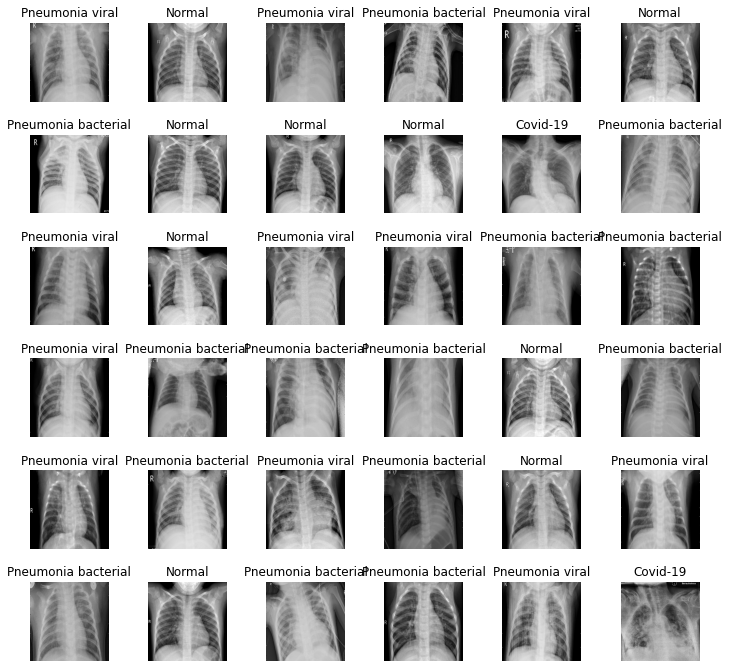

In [14]:
fig, axes = plt.subplots(6, 6, figsize=(12, 12))
axes = axes.ravel()

for i in np.arange(0, 36):
    axes[i].imshow(train_images[i])
    axes[i].set_title(label_name[np.argmax(train_labels[i])])
    axes[i].axis('off')
    
plt.subplots_adjust(wspace=0.5)

## Carregamento da rede neral com pesos pré-treinados
Transferência de aprendizagem <br>
https://image-net.org/

In [34]:
# include top = False pois nós criaremos nossa própria camada densa
# shape do input = altura, largura e canais de cores (rgb)

base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=Input(shape=(256,256, 3)))

94781440/94765736 [==============================] - 17s 0us/step


In [36]:
# podemos observar as camadas que foram baixadas
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 64, 64, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 64, 64, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 64, 64, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 64, 64, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 32, 32, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 32, 32, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 32, 32, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 32, 32, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 16, 16, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 16, 16, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 16, 16, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 16, 16, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 16, 16, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 16, 16, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 16, 16, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 16, 16, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 8, 8, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 8, 8, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 8, 8, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 8, 8, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [37]:
len(base_model.layers) # quantidade de camadas

175

In [39]:
# vamos re-treinar as 10 últimas camadas, as 165 camadas restantes ficarão com os pesos pré-treinados

for layer in base_model.layers[:-10]:
    layer.trainable = False

## Construção e treinamento do modelo de deep learning

In [40]:
head_model = base_model.output
head_model = AveragePooling2D()(head_model) # redução da dimensionalidade das images
head_model = Flatten()(head_model) # de matriz para vetor
head_model = Dense(256, activation='relu')(head_model) # camada densa com 256 neurônios (testar o nº de neurônios)
head_model = Dropout(0.2)(head_model) # evitar overfitting (zera 20% dos 256 neurônios)
head_model = Dense(256, activation='relu')(head_model)
head_model = Dropout(0.2)(head_model)
head_model = Dense(4, activation='softmax')(head_model) # camda de saída com 4 neurônios, um neurônio para cada classe

In [41]:
# input = inicio da RN e o output = camada densa da RN
model = Model(inputs = base_model.input, outputs = head_model)

In [48]:
# testar outros valores para lr e decay
model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(), metrics=['accuracy'])

In [52]:
checkpointer = ModelCheckpoint(filepath='weights.hdf5') # salva a rede pre-treinada

In [53]:
# batch_size = 4, pega 4 imagens, calcula o erro e o ajusta os pesos...

train_generator = image_generator.flow_from_directory(batch_size=4, directory=xray_directory, shuffle=True, target_size=(256, 256),
                                                     class_mode='categorical', subset='training')

Found 532 images belonging to 4 classes.


# Treinamento
Essa parte é a mais demorada, nesse caso a rede foi treinada apenas com 25 épocas (demorou +/- 3 horas), o ideal seria rodar, pelo menos, 200 épocas.

In [54]:
# treinamento das camadas densas, demora para treinar
history = model.fit(train_generator, epochs=25, callbacks=[checkpointer])

Epoch 1/25
133/133 [==============================] - 213s 2s/step - loss: 1.2413 - accuracy: 0.4154
Epoch 2/25
133/133 [==============================] - 239s 2s/step - loss: 1.1144 - accuracy: 0.4737
Epoch 3/25
133/133 [==============================] - 265s 2s/step - loss: 1.0307 - accuracy: 0.5338
Epoch 4/25
133/133 [==============================] - 247s 2s/step - loss: 0.9571 - accuracy: 0.6034
Epoch 5/25
133/133 [==============================] - 269s 2s/step - loss: 0.8721 - accuracy: 0.6184
Epoch 6/25
133/133 [==============================] - 197s 1s/step - loss: 0.8732 - accuracy: 0.6560
Epoch 7/25
133/133 [==============================] - 304s 2s/step - loss: 0.7741 - accuracy: 0.6842
Epoch 8/25
133/133 [==============================] - 281s 2s/step - loss: 0.7377 - accuracy: 0.6974
Epoch 9/25
133/133 [==============================] - 267s 2s/step - loss: 0.6817 - accuracy: 0.7444
Epoch 10/25
133/133 [==============================] - 284s 2s/step - loss: 0.6285 - accura

## Avaliação da rede neural

In [55]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

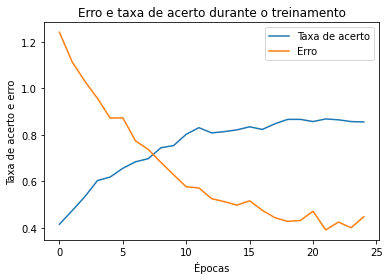

In [56]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Erro e taxa de acerto durante o treinamento')
plt.xlabel('Épocas')
plt.ylabel('Taxa de acerto e erro')
plt.legend(['Taxa de acerto', 'Erro']);

In [57]:
test_directory = 'Test/'

In [59]:
os.listdir(test_directory)

['0', '1', '2', '3']

In [61]:
test_gen = ImageDataGenerator(rescale=1./255) # escala entre 0 e 1

In [62]:
test_generator = test_gen.flow_from_directory(batch_size=40, directory=test_directory, shuffle=True, 
                                              target_size=(256, 256), class_mode='categorical')

Found 40 images belonging to 4 classes.


In [64]:
# validação do modelo
evaluate = model.evaluate(test_generator)

1/1 [==============================] - 10s 10s/step - loss: 1.2190 - accuracy: 0.6500


In [65]:
# modelo ficou +/-
evaluate

[1.2190446853637695, 0.6499999761581421]

In [68]:
prediction = []
original = []
image = []

for i in range(len(os.listdir(test_directory))):
    for file in os.listdir(os.path.join(test_directory, str(i))): # percorre todas as imagens em todos os diretórios
        # print(os.listdir(os.path.join(test_directory, str(i))))
        
        img = cv2.imread(os.path.join(test_directory, str(i), file)) # lê a imagem na pasta test, pasta i e arquivo n
        img = cv2.resize(img, (256, 256))
        image.append(img)
        
        img = img / 255 # coloca na escala entre 0 e 1
        img = img.reshape(-1, 256, 256, 3) 
        
        predict = model.predict(img)
        predict = np.argmax(predict) # busca o indice onde tem a maior probabilidade
        prediction.append(predict)
        
        original.append(i)

In [70]:
print(prediction)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 2, 0, 1, 1, 1, 3, 0, 1, 0, 0, 2, 0, 1, 1, 3, 3]


In [71]:
print(original)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


In [72]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [73]:
accuracy_score(original, prediction) # treinar por mais epocas e polir a rede

0.65

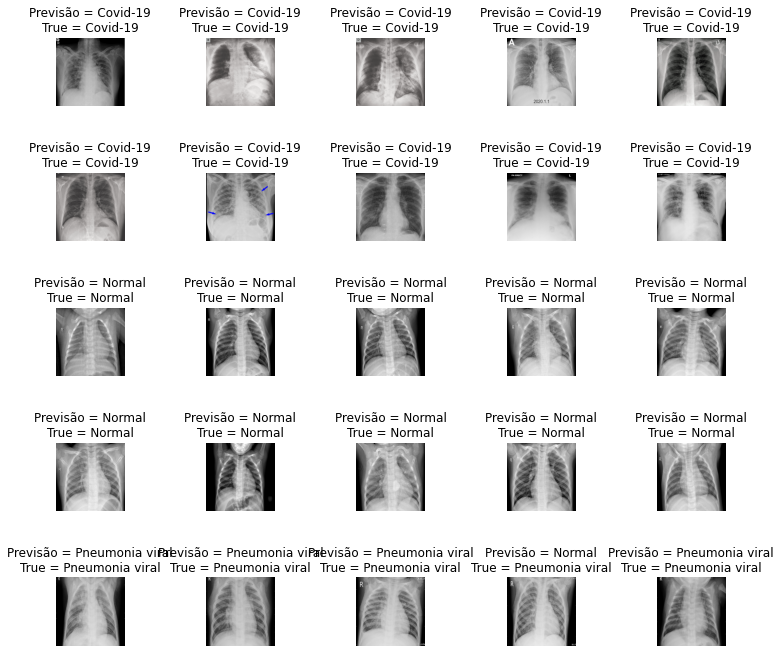

In [75]:
fig, axes = plt.subplots(5, 5, figsize=(12, 12))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(image[i])
    axes[i].set_title(f'Previsão = {str(label_name[prediction[i]])}\nTrue = {str(label_name[original[i]])}')
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1.2)

In [77]:
label_name

{0: 'Covid-19', 1: 'Normal', 2: 'Pneumonia viral', 3: 'Pneumonia bacterial'}

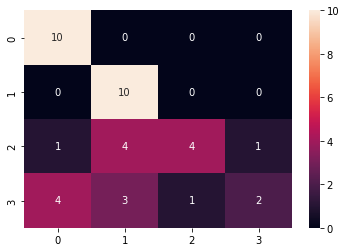

In [76]:
cm = confusion_matrix(original, prediction)
sns.heatmap(cm, annot=True);

# x = previsões
# y = originais

In [78]:
print(classification_report(original, prediction))

              precision    recall  f1-score   support

           0       0.67      1.00      0.80        10
           1       0.59      1.00      0.74        10
           2       0.80      0.40      0.53        10
           3       0.67      0.20      0.31        10

    accuracy                           0.65        40
   macro avg       0.68      0.65      0.60        40
weighted avg       0.68      0.65      0.60        40



## Classificação de apenas uma imagem

In [15]:
from keras.models import load_model

In [16]:
model_loaded = load_model('weights.hdf5') # carregar o modelo salvo e pre treinado

In [17]:
model_loaded.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 64, 64, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 64, 64, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 64, 64, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 64, 64, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 32, 32, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 32, 32, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 32, 32, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 32, 32, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 16, 16, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 16, 16, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 16, 16, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 16, 16, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 16, 16, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 16, 16, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 16, 16, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 16, 16, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                  'conv5_block1_3_bn[0][0]']      
                                                                                                  
 conv5_block1_out (Activation)  (None, 8, 8, 2048)   0           ['conv5_block1_add[0][0]']       
                                                                                                  
 conv5_block2_1_conv (Conv2D)   (None, 8, 8, 512)    1049088     ['conv5_block1_out[0][0]']       
                                                                                                  
 conv5_block2_1_bn (BatchNormal  (None, 8, 8, 512)   2048        ['conv5_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_1_relu (Activatio  (None, 8, 8, 512)   0           ['conv5_block2_1_bn[0][0]']      
 n)       

In [18]:
# imagem de um pulmão com covid-19 para teste
img = cv2.imread('Test/0/1-s2.0-S0929664620300449-gr2_lrg-b.jpg')

In [19]:
img

array([[[ 44,  44,  44],
        [  1,   1,   1],
        [  1,   1,   1],
        ...,
        [255, 255, 255],
        [253, 253, 253],
        [254, 254, 254]],

       [[ 46,  46,  46],
        [  2,   2,   2],
        [  1,   1,   1],
        ...,
        [255, 255, 255],
        [253, 253, 253],
        [254, 254, 254]],

       [[ 45,  45,  45],
        [  1,   1,   1],
        [  0,   0,   0],
        ...,
        [255, 255, 255],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[ 44,  44,  44],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[ 44,  44,  44],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[ 44,  44,  44],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [20]:
img.shape

(1161, 1170, 3)

In [21]:
img = cv2.resize(img, (256, 256))

In [22]:
img = img/255
img

array([[[0.        , 0.        , 0.        ],
        [0.00392157, 0.00392157, 0.00392157],
        [0.01568627, 0.01568627, 0.01568627],
        ...,
        [0.        , 0.        , 0.        ],
        [0.00784314, 0.00784314, 0.00784314],
        [1.        , 1.        , 1.        ]],

       [[0.        , 0.        , 0.        ],
        [0.00392157, 0.00392157, 0.00392157],
        [0.98823529, 0.98823529, 0.98823529],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [1.        , 1.        , 1.        ]],

       [[0.00392157, 0.00392157, 0.00392157],
        [0.00392157, 0.00392157, 0.00392157],
        [0.99607843, 0.99607843, 0.99607843],
        ...,
        [0.        , 0.        , 0.        ],
        [0.00392157, 0.00392157, 0.00392157],
        [1.        , 1.        , 1.        ]],

       ...,

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0

In [23]:
img.shape

(256, 256, 3)

In [24]:
img = img.reshape(-1, 256, 256, 3)
img.shape

(1, 256, 256, 3)

In [25]:
predict = model_loaded(img)
predict

<tf.Tensor: shape=(1, 4), dtype=float32, numpy=
array([[9.9883050e-01, 3.7161251e-05, 1.1022845e-03, 3.0112300e-05]],
      dtype=float32)>

In [26]:
predict = np.argmax(predict)
predict

0

In [27]:
label_name[predict]

'Covid-19'